In [1]:
import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns
from timeit import default_timer as timer
sns.set(style="darkgrid")
%matplotlib inline


In [2]:
data = pd.read_csv('../data/all_variants_annotated_merged.csv')

In [3]:
data

,simplified.significance,AA.wt,pos,AA.mut,year,foldx.ddg,covar.2d,Allele.Frequency,cb.nbr.cat,Allele.Count,genomic.locus,inheritance,disease.cat,protein,variant,AC.gnomAD
0,pathogenic,R,303,C,2018.0,1.156203,0.656840,0.000020,buried,1,22-40757536-C-T,AR,metabolic,ADSL,ADSL_R303C,5
1,pathogenic,R,426,H,2018.0,1.100152,0.840247,0.000199,buried,1,22-40760969-G-A,AR,metabolic,ADSL,ADSL_R426H,49
2,pathogenic,K,246,E,2017.0,8.890600,0.520974,0.000025,buried,1,22-40756440-A-G,AR,metabolic,ADSL,ADSL_K246E,7
3,benign,K,147,M,2019.0,-0.419810,0.287928,0.004325,buried,1,22-40750289-A-T,AR,metabolic,ADSL,ADSL_K147M,1199
4,pathogenic,A,2,V,2012.0,NaN,NaN,0.000115,NaN,1,22-40742567-C-T,AR,metabolic,ADSL,ADSL_A2V,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,gnomAD,V,84,M,2017.0,1.928160,0.663212,0.000004,buried,1,3-10183781-G-A,AD,cancer,VHL,VHL_V84M,1
8486,1/10k,R,200,W,2017.0,-0.942926,0.960276,0.000209,exposed,58,3-10191605-C-T,AD,cancer,VHL,VHL_R200W,58
8487,1/10k,P,25,L,2017.0,NaN,0.040587,0.002996,NaN,507,3-10183605-C-T,AD,cancer,VHL,VHL_P25L,507
8488,1/10k,P,40,L,2017.0,NaN,0.260363,0.000248,NaN,45,3-10183650-C-T,AD,cancer,VHL,VHL_P40L,45


In [4]:
a = data[['foldx.ddg', 'covar.2d', 'Allele.Frequency', 'Allele.Count', 'AC.gnomAD']]
a

,foldx.ddg,covar.2d,Allele.Frequency,Allele.Count,AC.gnomAD
0,1.156203,0.656840,0.000020,1,5
1,1.100152,0.840247,0.000199,1,49
2,8.890600,0.520974,0.000025,1,7
3,-0.419810,0.287928,0.004325,1,1199
4,NaN,NaN,0.000115,1,29
...,...,...,...,...,...
8485,1.928160,0.663212,0.000004,1,1
8486,-0.942926,0.960276,0.000209,58,58
8487,NaN,0.040587,0.002996,507,507
8488,NaN,0.260363,0.000248,45,45


/home/matheus/anaconda3/lib/python3.7/site-packages/hypertools/tools/format_data.py:141: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')
/home/matheus/anaconda3/lib/python3.7/site-packages/hypertools/plot/plot.py:221: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '
/home/matheus/anaconda3/lib/python3.7/site-packages/hypertools/tools/format_data.py:141: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')


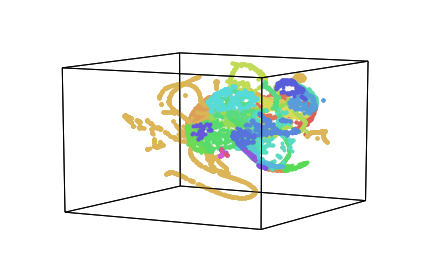

In [5]:
cluster_labels = hyp.cluster(a, n_clusters=37)
hyp.plot(a, '.', reduce='TSNE', ndims=3, group=cluster_labels)